### 4.5

c:\Users\mfurk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_birch.py:727: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (2). Decrease the threshold.
  warnings.warn(


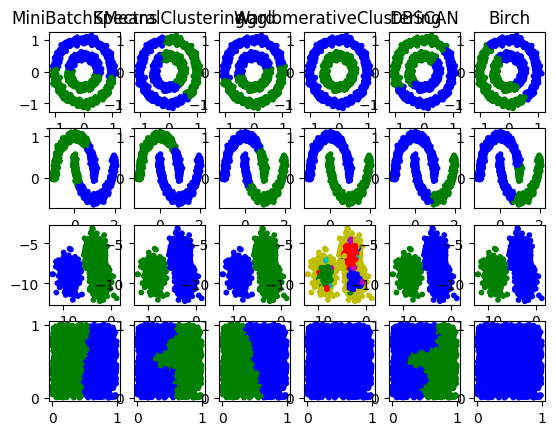

In [8]:
from sklearn import datasets , cluster
from sklearn.preprocessing import StandardScaler

import numpy as np 
import matplotlib.pyplot as plt 

n_samples = 1500
ns_circ = datasets.make_circles(n_samples=n_samples, factor = 0.5, noise = 0.05)
ns_moons = datasets.make_moons(n_samples=n_samples, noise = 0.05)
blobs = datasets.make_blobs(n_samples=n_samples)
no_struc = np.random.rand(n_samples, 2),None

clus_names = ["MiniBatchKMeans", "SpectralClustering", "Ward", "AgglomerativeClustering", "DBSCAN", "Birch"]

color = np.array(["b", "g", "r", "c", "m", "y"])
datasets = [ns_circ, ns_moons, blobs, no_struc]

plt.figure()
i= 1
for i_dataset, dataset in enumerate(datasets):

    X, y = dataset
    StandardScaler().fit_transform(X)

    two_means = cluster.MiniBatchKMeans(n_clusters=2)
    ward = cluster.AgglomerativeClustering(n_clusters=2, linkage="ward")
    spectral = cluster.SpectralClustering(n_clusters=2)
    dbscan = cluster.DBSCAN(eps = 0.2)
    avg_linkage = cluster.AgglomerativeClustering(n_clusters=2, linkage="average")
    birch = cluster.Birch(n_clusters=2)

    clus_alg = [two_means,ward,spectral, dbscan, avg_linkage, birch ]

    for name, algo in zip(clus_names, clus_alg):
        algo.fit(X)

        if hasattr(algo, "labels_"):
            y_pred = algo.labels_.astype(int)
        else:
            y_pred = algo.predict(X)
        plt.subplot(len(datasets), len(clus_alg), i)
        if i_dataset == 0:
            plt.title(name)
        plt.scatter(X[:, 0], X[:, 1], color=color[y_pred % len(color)], s=10)


        i += 1
